# Цель проекта: Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры

# Описание проекта: Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные. При анализе использовал критерий Стьюдента для независимых выборок.

# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Открыть файл с данными и изучить общую информацию

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import numpy as np

In [8]:
from scipy import stats as st

In [9]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [12]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [13]:
data.shape[0]

16715

# Шаг 2. Подготовить данные

##### Замените названия столбцов (приведите к нижнему регистру):

In [14]:
data.columns=data.columns.str.lower()

In [15]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему:

In [16]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [17]:
schedule_of_columns = ['year_of_release']

In [18]:
for col in schedule_of_columns:
        data[col] = data[col].astype('Int64')
 #pd.to_numeric(data[col], errors='ignore')
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [19]:
#data['user_score'] = data['user_score'].astype('Float64')
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [20]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [21]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [22]:
data['user_score'] = data['user_score'].astype('float')
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Вывод:

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


В начале мы думали по какому принципу отсортированы данные, возможно это помогло бы нам в заполнении пропущенных значений,но на тот момент мы  этого не нашли, теперь мы видим, что дата фрейм был отсортирован по тотал сейлс 

# Шаг 3. Провести исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Количество выпущенных игр за разные годы')

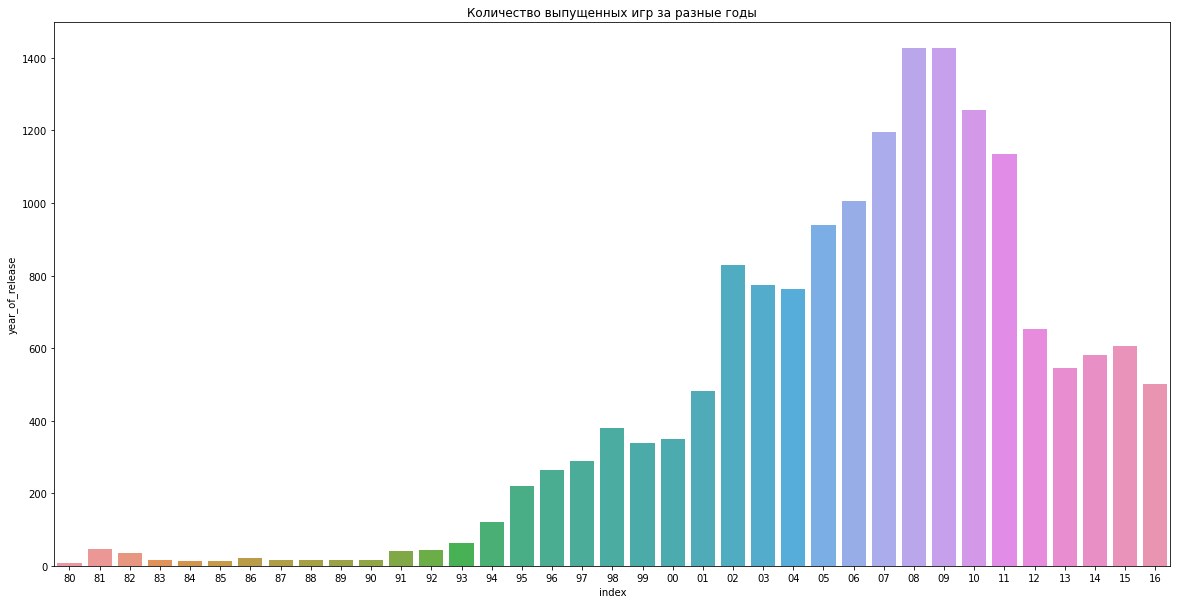

In [24]:
by_year = data['year_of_release'].value_counts().reset_index().sort_values(by = 'index')
by_year['index'] = by_year['index'].apply(lambda x: str(x)[-2:])
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(by_year['index'], by_year['year_of_release'],ax=ax)
plt.title('Количество выпущенных игр за разные годы')

Численно данных мало с 80 по 90 года, но мы все еще попробуем изучить все данные.

In [25]:
data['name'].value_counts()

Need for Speed: Most Wanted            12
Madden NFL 07                           9
Ratatouille                             9
LEGO Marvel Super Heroes                9
FIFA 14                                 9
                                       ..
Super Famista 3                         1
Crimson Skies: High Road to Revenge     1
Far Cry Instincts Predator              1
Madagascar: Operation Penguin           1
Project Gotham Racing                   1
Name: name, Length: 11559, dtype: int64

In [26]:
top_10_platforms = data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending =False).iloc[0:10, 0].to_list()

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

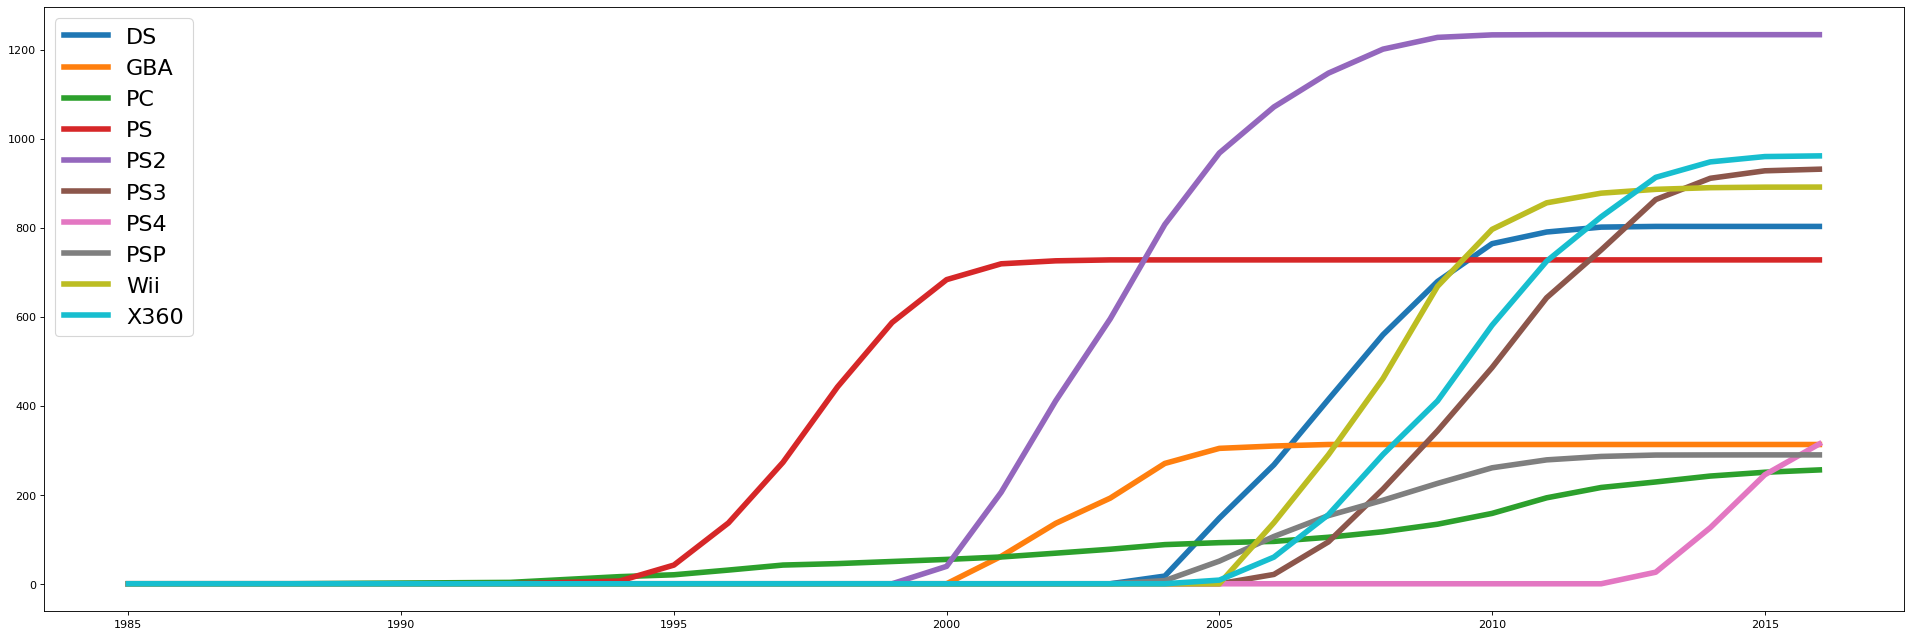

In [27]:
from matplotlib.pyplot import figure
grouped_by_year_planets = data[data['platform'].isin(top_10_platforms)].groupby(['year_of_release', 'platform'], as_index = False)['total_sales'].sum()
table2 = pd.pivot_table(grouped_by_year_planets, values='total_sales', index=['year_of_release'], columns=['platform'])
table2 = table2.fillna(0)
table3 = table2.cumsum()
figure(figsize=(30, 10), dpi=80)
for i in table3.columns:
    plt.plot(table3[i], linewidth = 5 )
#plt.yscale('log')
plt.legend(table3.columns, loc = 'upper left',  prop={'size': 20})
# plt.figure(figsize = (100, 100))

Изучив график, нам стало ясно, что в среднем платформы живут от 7 до 9 лет, когда появлялись платформы более нового поколения, выпуск игр на на старые платформы прекращались в течении 1-2 года.

In [28]:
by_platforms = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending =False)
by_platforms


,platform,year_of_release,total_sales
134,PS2,2004,211.81
200,Wii,2009,206.97
132,PS2,2002,205.38
133,PS2,2003,184.31
199,Wii,2008,171.32
...,...,...,...
119,PCFX,1996,0.03
94,PC,1988,0.03
10,3DO,1994,0.02
25,DS,1985,0.02


In [29]:
top_10_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

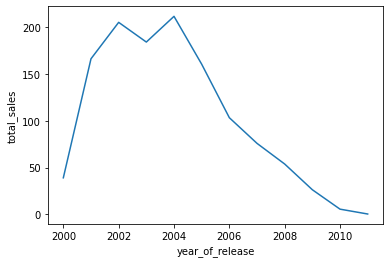

In [30]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='PS2'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

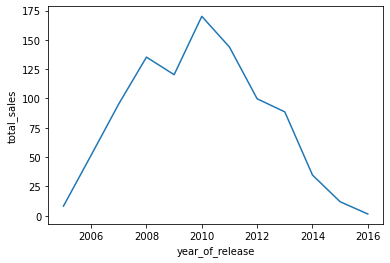

In [31]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='X360'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

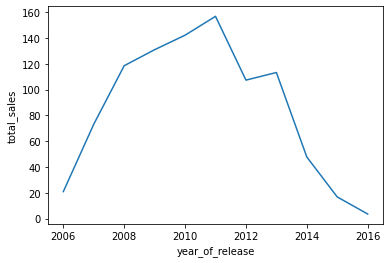

In [32]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='PS3'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

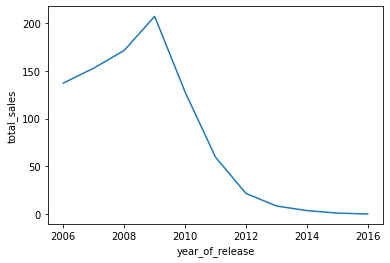

In [33]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='Wii'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

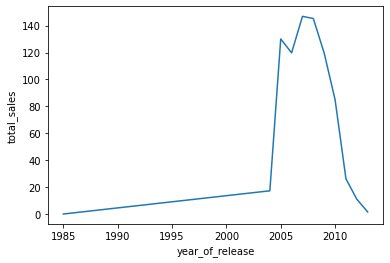

In [34]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='DS'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

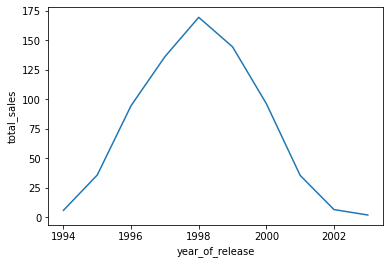

In [35]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='PS'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

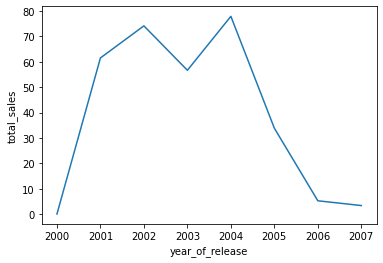

In [36]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='GBA'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

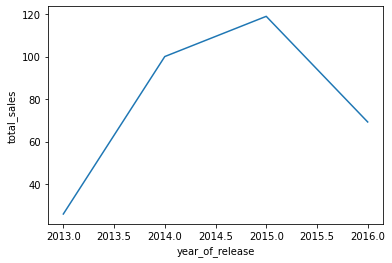

In [37]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='PS4'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

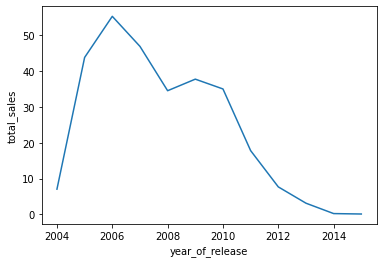

In [38]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='PSP'], x='year_of_release', y='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

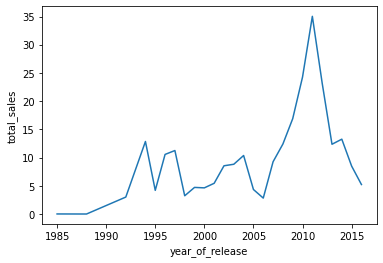

In [39]:
sns.lineplot(data=by_platforms[by_platforms['platform']=='PC'], x='year_of_release', y='total_sales')

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Платформы которые находятся в топе 10 на данный период времени, есть тенденция упада, предположение, что в следующем году кол-во продаж так и и будут падать для этих платформ.

In [40]:
creation = data.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
creation['living']= creation['max'] - creation['min']
creation

,platform,min,max,living
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


Если учитывать данные по графикам и таблице выше, можно сделать прогноз,  что платформы выпускаемые крупными компаниями и которые прожили относительно мало по сравнению с их предшествиниками, можно считать самыми патенциально прибыльными на 2017 год. Те платформы которые уже прожили свое и продажи которых не уклонно падают, скорее всего больше не пренесут значительно прибыли.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

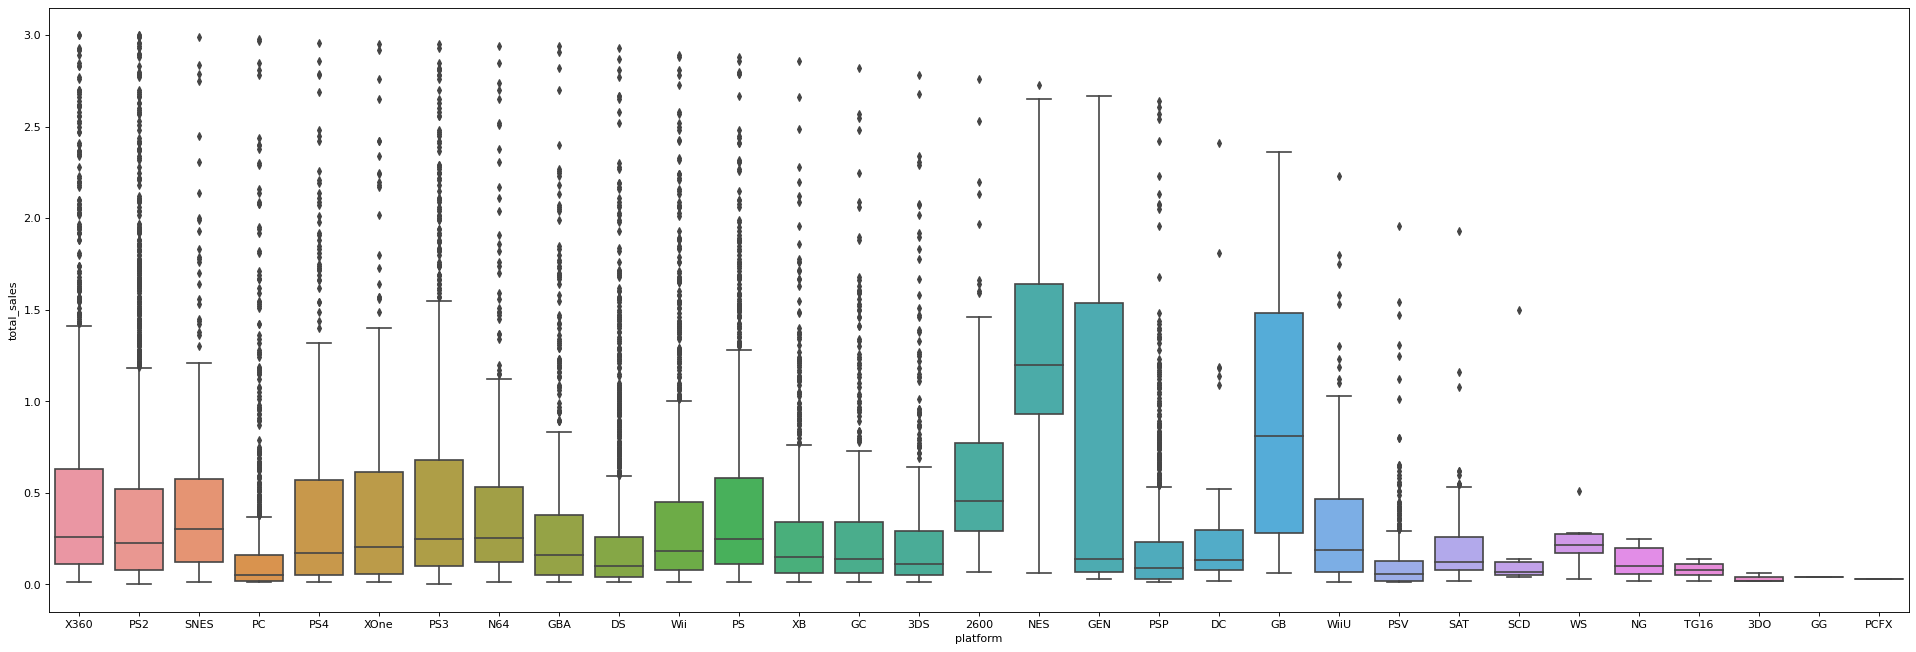

In [41]:
figure(figsize=(30, 10), dpi=80)
sns.boxplot(data= data.query('total_sales <=3'), x='platform', y = 'total_sales')

Можно в целом сказать, что в принципе у всех платформ значения не превышаюь 3 млн. У платформы GEN, GB, NES очень большие разбросы по сравнению с остальными платформами. GEN однако имеет очень низкую медиану и разброс вызван меньшим количеством выслких значений. Медиана у большинства платформ не больше 0.5 млн. Есть исключения у таких платформ как NES, GB.

Задание
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Text(0.5, 1.0, 'Пользовательские показатели ')

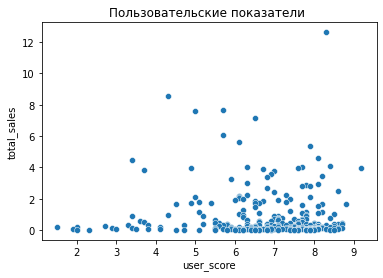

In [42]:
sns.scatterplot(data=data[data['platform']=='PS4'], x='user_score', y='total_sales')
plt.title('Пользовательские показатели ')

In [43]:
data[data['platform']=='PS4']['user_score'].corr(data[data['platform']=='PS4']['total_sales'])

-0.031957110204556376

Text(0.5, 1.0, 'Показатели критиков')

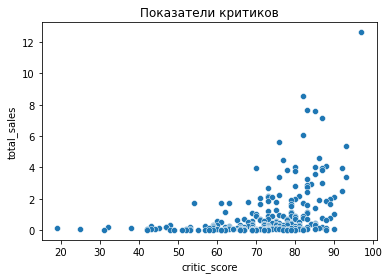

In [44]:
sns.scatterplot(data=data[data['platform']=='PS4'], x='critic_score', y='total_sales')
plt.title('Показатели критиков')

In [45]:
data[data['platform']=='PS4']['critic_score'].corr(data[data['platform']=='PS4']['total_sales'])

0.40656790206178095

Вывод: Если смотреть на изменение средней то корреляцию проследить сложно, потому, что большинство точек все еще имеют очень низкие значение тотал сейлз, но что точно можно утверждать, так это то, что чем больше становиться рейтинг тем выше шанс возникновения аномально высоких значении. Скорее всего это те игры которые становятся культовыми и приносят огромную сумму, по сравнению с играми среднего уромвня.

In [46]:
data.groupby('platform')['total_sales'].sum()

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

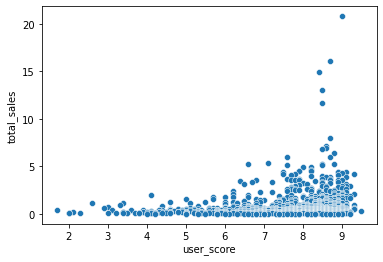

In [47]:
sns.scatterplot(data=data[data['platform']=='PS2'], x='user_score', y='total_sales')

In [48]:
data[data['platform']=='PS2']['user_score'].corr(data[data['platform']=='PS2']['total_sales'])

0.17286551112058227

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

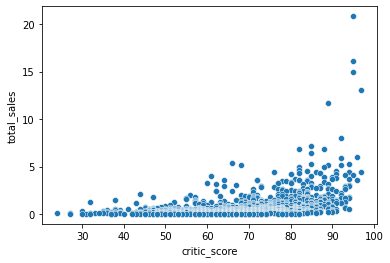

In [49]:
sns.scatterplot(data=data[data['platform']=='PS2'], x='critic_score', y='total_sales')

In [50]:
data[data['platform']=='PS2']['critic_score'].corr(data[data['platform']=='PS2']['total_sales'])

0.39543454945454876

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

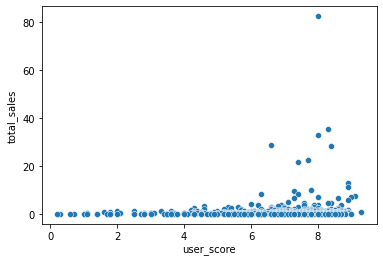

In [51]:
sns.scatterplot(data=data[data['platform']=='Wii'], x='user_score', y='total_sales')

In [52]:
data[data['platform']=='Wii']['user_score'].corr(data[data['platform']=='Wii']['total_sales'])

0.11241436067003163

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

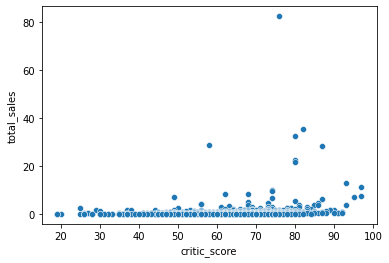

In [53]:
sns.scatterplot(data=data[data['platform']=='Wii'], x='critic_score', y='total_sales')

In [54]:
data[data['platform']=='Wii']['critic_score'].corr(data[data['platform']=='Wii']['total_sales'])

0.17755988806089956

Если соотнести ПС2 и ВИИ и ПС4 то она имее наибольшуу корреляцию 0.17.Скорее всего это связано с тем что игры которые имеют высокий рейтинг все еще очень часто низкое значение тотал сейлз. Выбросы очень сильно поднимают среднее значение. Иточно также они плохо влияют на корреляцию так как происходит хаотично 

In [55]:
data_genre=pd.pivot_table(data, index='genre',values='total_sales', aggfunc=['sum','max','min','mean','count']).reset_index().droplevel(level=1, axis=1)
data_genre.columns

Index(['genre', 'sum', 'max', 'min', 'mean', 'count'], dtype='object')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='mean'>

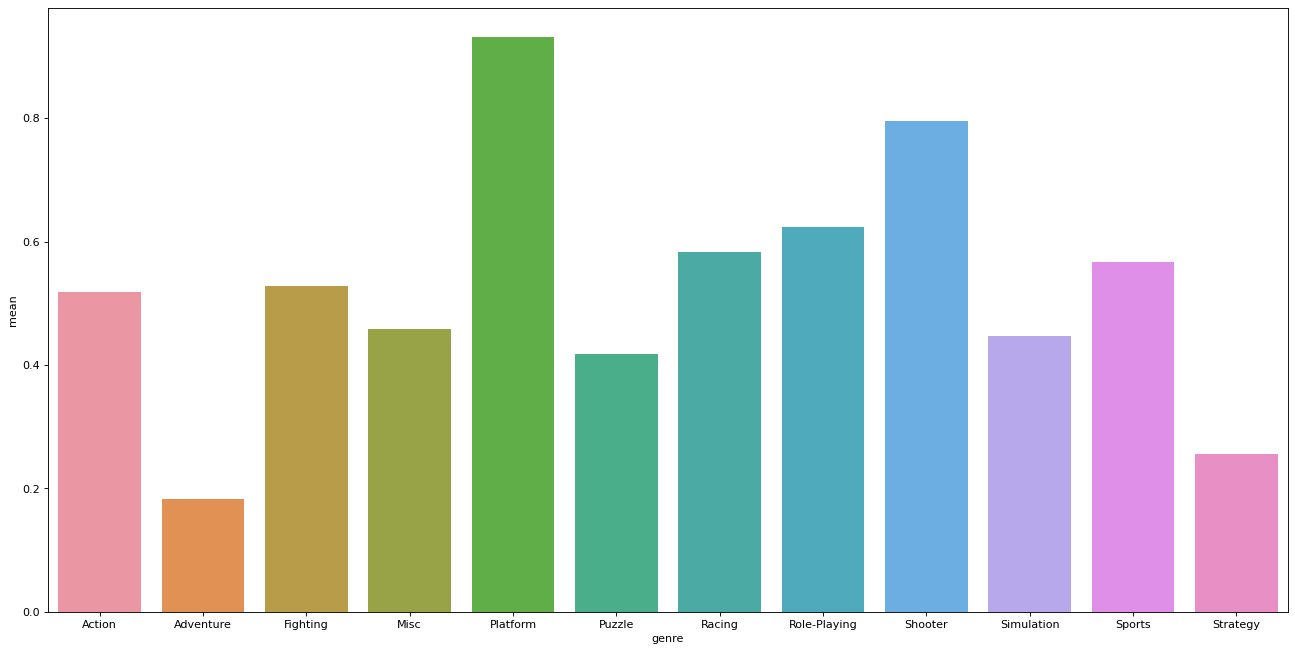

In [56]:
figure(figsize=(20, 10), dpi=80)
sns.barplot(data_genre['genre'], data_genre['mean'])

Самые прибыльные жанры они же и многочисленные, по этим жанрам создавалось больше игр Action, Sports. Если считать по среднему то самые прибыльные становятся Shooter, Role-Playing. Если смотреть по максимальноиу значению то самая прибыльные это Sports.

# Шаг 4. Составить портрет пользователя каждого региона

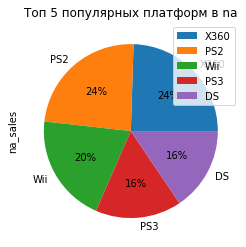

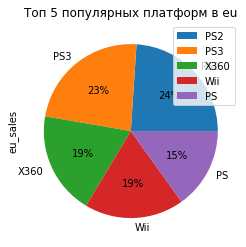

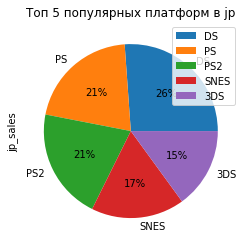

In [57]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data.pivot_table(index=['platform'],
                     values= i,
                     aggfunc='sum').sort_values(by= i, ascending=False).head(5).plot(kind='pie', autopct='%1.0f%%', subplots=True, grid=False)
    plt.title('Топ 5 популярных платформ в '+ i[:2])
                                                                                         
                                            
                                    
                

ПС2 входит в топ 5 во всех регионах. Большинство других платформ занимают существенную долю в двух регионах( ДС в na и jp; Х360 в на и европе и т.д.) Ни кто не имеют доли продаж более чем 30% и в целом они более менее сбалансированы. Пример: в Америке первое место делят с 24% ПС2 и Х360. 

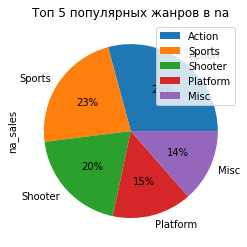

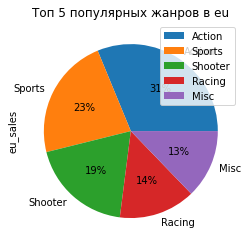

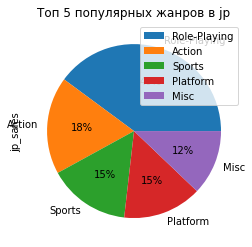

In [58]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data.pivot_table(index=['genre'],
                     values= i,
                     aggfunc='sum').sort_values(by= i, ascending=False).head(5).plot(kind='pie', autopct='%1.0f%%', subplots=True, grid=False)
    plt.title('Топ 5 популярных жанров в '+ i[:2])

По жанром виден больше дисбаланс чем по платформам. Самые прибыльные жанры могут занимать 30%, что в свою очередь более чем в 2 раза больше чем 5 место. Разница по регионам по жанру намного меньше чем по платформам, сдесь все намного стабильнее, т.е. во все регионы в топ 5 жанров входят Action, Sports, Misc. Интересным замечанием является то что в японии самым популярным жанром  является Role-Playing хотя в других регионах он не входит даже в топ 5.

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

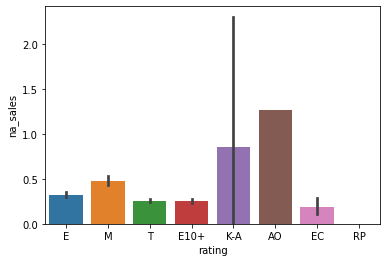

In [59]:
sns.barplot(data=data, x='rating', y='na_sales')

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

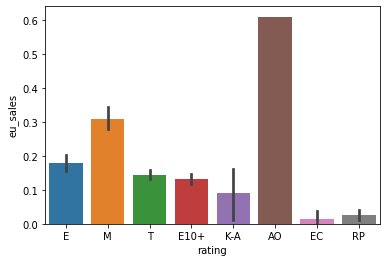

In [60]:
sns.barplot(data=data, x='rating', y='eu_sales')

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

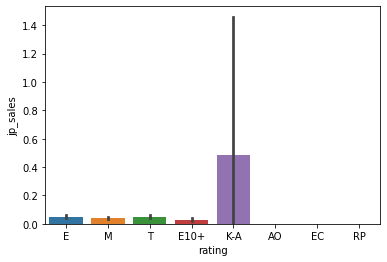

In [61]:
sns.barplot(data=data, x='rating', y='jp_sales')

Ретинг игр имет огромное значение регионах, какие то определенные возвростные рейтинги дают большую среднюю прибыль, В америке самая прибыльная возростная категория К-А и АО, в европе же чуть по другому АО и М, а вот в Японии совсем по другому львиную часть рынка захватил рейтинг К-А.

# Шаг 5. Проверить гипотезы


* Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и Средние пользовательские рейтинги жанров Action и Sports разные.
* Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные и Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [62]:
results = st.ttest_ind(
    data[data['platform'] =='XOne']['user_score'],
    data[data['platform'] =='PC']['user_score'],
    equal_var = False,
    nan_policy='omit'
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


4.935072360183565e-06
Отвергаем нулевую гипотезу


In [63]:
results = st.ttest_ind(
    data[data['genre'] =='Action']['user_score'],
    data[data['genre'] =='Sports']['user_score'],
    equal_var = False,
    nan_policy='omit'
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

0.11483818791498648
Отвергаем нулевую гипотезу


Мы сумели опровергнуть нулевую гипотезу 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;'.
Гипотезу 'Средние пользовательские рейтинги жанров Action и Sports  разные' так же опровергли. Отличием эих гиротез были ключевые слова 'одинаковые' и 'разные'. Для проверки гипотез  мы применили Т-тест, который проверяет одинаковые ли средние значения столбцов. По умолчанию Т-тест проверяет утверждение 'одинаковые', поэтому мы для второй гипотезы поменяли условие опровержения гипотезы.

# Шаг 6. Общий вывод

В данной проектной работе, источником данных нам служили продажи в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. В ходе проектной работы нам удалось найти определяющие успешность игры закономерности. Во первых хотеллось бы сказать что количество выпускаемых игр за последние 5 лет уменьшились в 2 раза. Далее:
* Платформа на которой выпускается игра очень важна и является из определюящихся самой актуальной является ПC3 и Xbox One а также игры на ПК(считаю что игры на пк всегда будут актульными так как судя по графику хоть и есть спады но он продолжителен 30 лет, когда средний срок службы других платформ 7-9 лет). Так же нужно учитывать что регион так же важен, если в америке и в европе вкусы в целом схожи у обоих популярны ПС2 ПС3 XBOX, Wii, то в японии XBOX, Wii не популярен и не входит в топ 5, это очень важно.
* Теперь перейдем к жанрам, разница по регионам по жанру намного меньше чем по платформам, сдесь все намного стабильнее, т.е. во все регионы в топ 5 жанров входят Action, Sports, Misc. Интересным замечанием является то что в японии самым популярным жанром является Role-Playing хотя в других регионах он не входит даже в топ 5. Т.е. нужно больше закупать игр в жанре Action, Sports, Misc, так как они самые прибыльные!
* Ретинг игр имет огромное значение, в америке самая прибыльная возростная категория К-А и АО, в европе же чуть по другому АО и М, а вот в Японии совсем по другому львиную часть рынка захватил рейтинг К-А.
Так же мы сумели опровергнуть нулевую гипотезу 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;'. Гипотезу 'Средние пользовательские рейтинги жанров Action и Sports разные' так же опровергли.
Данный проект отличался от других, тем что тут было много пропущенных значений поэтому нам приходилось использовать разные методы, что бы работать с ними. Активно использовали pivot_table благодаря чему исследовали определенные столбцы.